In [3]:


import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report ,r2_score, mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [4]:
df = pd.read_excel ("HW_Data_Set.xlsx")
print (df)

      ind_5  ind_6       ind_8      ind_9     ind_10     ind_12     ind_13  \
0        19     17  100.000000  85.714286  14.285714  72.363515  60.808814   
1        24     19  100.000000  78.571429  21.428571  74.275883  64.366798   
2        30     24  100.000000  71.428571  28.571429  75.140402  65.915803   
3        37     30  100.000000  64.285714  35.714286  76.677846  68.584234   
4        41     37  100.000000  57.142857  42.857143  81.603007  76.455495   
...     ...    ...         ...        ...        ...        ...        ...   
6162     27     31   57.142857  28.571429  28.571429  60.010531  32.362582   
6163     22     27   50.000000  21.428571  28.571429  60.209998  32.914628   
6164     19     22   42.857143  14.285714  28.571429  64.329611  43.550592   
6165     19     19  100.000000   7.142857  92.857143  69.027764  54.130755   
6166     19     19   92.857143   0.000000  92.857143  65.157180  45.524973   

      ind_14  ind_15  ind_16  ...  ind_416  ind_418  ind_420  i

In [5]:
df = df.drop(["50_target","90_target"], axis=1)

df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065


In [6]:
df = df.drop(["ind_420","ind_422","ind_109"], axis=1)

In [7]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-16,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-10,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-24,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065


In [8]:
df=df.dropna()

In [9]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-16,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-10,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-24,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065


In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [11]:
X = df.drop('20_target', 1)
y =df['20_target']

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state=42, shuffle=False)



In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

14.908581427833127

In [ ]:
importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},index=X_train.columns)
importance.sort_values(by= "Importance", axis=0,ascending=False)[0:20].plot(kind="barh")

In [21]:


rf_t = RandomForestRegressor(random_state=42,max_depth=5,min_samples_leaf=5,n_estimators=300)
rf_tune=rf_t.fit(X_train,y_train)

In [14]:
y_pred = rf_model.predict(X_test)

np.sqrt(mean_squared_error(y_test,y_pred))

14.908581427833127

<AxesSubplot:>

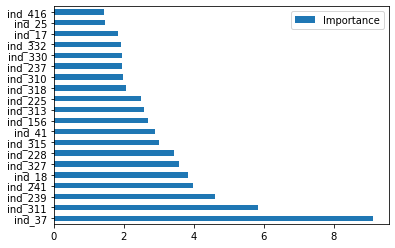

In [18]:
importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},index=X_train.columns)
importance.sort_values(by= "Importance", axis=0,ascending=False)[0:20].plot(kind="barh")

In [20]:
good_cat = list(importance.sort_values(by= "Importance", axis=0,ascending=False)[0:15].T.columns)


In [21]:
good_cat

['ind_37',
 'ind_311',
 'ind_239',
 'ind_241',
 'ind_18',
 'ind_327',
 'ind_228',
 'ind_315',
 'ind_41',
 'ind_156',
 'ind_313',
 'ind_225',
 'ind_318',
 'ind_310',
 'ind_237']

# RESULTS BEFORE  THE TUNE


In [18]:
modeller = [
   rf_model
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = np.sqrt(mean_squared_error(y_test,y_pred))
    print("-"*28)
    print(isimler + ":" )
    print("mean_squared_error:", dogruluk)

----------------------------
RandomForestRegressor:
mean_squared_error: 14.908581427833127


# RESULTS AFTER  THE TUNE


In [22]:
modeller = [
    rf_tune
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    dogruluk = np.sqrt(mean_squared_error(y_test,y_pred))
    print("-"*28)
    print(isimler + ":" )
    print("mean_squared_error:", dogruluk)

----------------------------
RandomForestRegressor:
mean_squared_error: 14.84227087053017
